this code is intended for univariate feature selection because data is saved in x_train

In [ ]:
!pip install openpyxl==3.0.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from catboost import CatBoostClassifier

Reading the data using pandas

In [ ]:
df=pd.read_excel('/content/pcos main data.xlsx',sheet_name='Full_new')

'sheet_name' used because the data is on 'full new' sheet




displaying first 5 values

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [ ]:
df.tail(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537.0,537.0,0.0,35.0,50.0,164.592,18.5,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.3,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.4,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.2,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN
540,541.0,541.0,1.0,23.0,82.0,165.000,30.1,13.0,80.0,20.0,...,1.0,0.0,120.0,70.0,9.0,10.0,19.0,18.0,6.9,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [ ]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

# Handling missing values

as we can see that we have two rows as strings and two rows have 1 value missing in each lets rectify this

In [ ]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
#dealing with missing values by taking mode of that coloumn
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode()[0],inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0],inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].mode()[0],inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].mode()[0],inplace=True)

In [ ]:
df = df.astype({"Height(Cm) ":'int',"Pulse rate(bpm) ":'int',"PCOS (Y/N)":'int', " Age (yrs)":'int',"Blood Group":'int',"Hip(inch)":'int',"Pimples(Y/N)":'int',"Waist(inch)":'int',"Cycle length(days)":'int',"Weight (Kg)":'int',"Pregnant(Y/N)":'int',"No. of aborptions":'int',"RBS(mg/dl)":'int',"RR (breaths/min)":'int',"Cycle(R/I)":'int',"Marraige Status (Yrs)":'int',"Weight gain(Y/N)":'int',"hair growth(Y/N)":'int',"Skin darkening (Y/N)":'int',"Hair loss(Y/N)":'int',"Fast food (Y/N)":'int',"Reg.Exercise(Y/N)":'int',"BP _Systolic (mmHg)":'int',"BP _Diastolic (mmHg)":'int',"Follicle No. (L)":'int',"Follicle No. (R)":'int',"Avg. F size (L) (mm)":'int',"Avg. F size (R) (mm)":'int'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    int64  
 5   Height(Cm)              541 non-null    int64  
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    int64  
 14  Pregnant(Y/N)           541 non-null    in

# Grouping Data (0,1)

In [ ]:
#grouping the data
g = df.groupby('PCOS (Y/N)')
g

In [ ]:
p1=g.get_group(1)
p1

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
2,3.0,3.0,1,33,68,165,25.270891,11,72,18,...,1,0,120,80,13,15,18,20,10.0,NaN
12,13.0,13.0,1,25,74,152,32.029086,17,72,18,...,1,1,120,80,15,8,20,21,8.0,NaN
19,20.0,20.0,1,30,85,165,31.221304,16,72,18,...,1,0,120,80,16,8,18,17,11.0,NaN
24,25.0,25.0,1,34,63,158,25.236340,11,72,20,...,1,0,120,70,4,6,18,17,7.3,NaN
26,27.0,27.0,1,30,76,160,29.687500,15,75,18,...,1,1,120,80,21,20,11,12,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,521.0,521.0,1,27,50,168,17.700000,13,72,18,...,0,0,120,70,18,20,20,19,7.8,NaN
523,524.0,524.0,1,36,60,150,26.700000,15,72,18,...,0,0,110,80,6,9,17,22,7.6,NaN
524,525.0,525.0,1,27,70,170,24.000000,13,72,18,...,0,0,120,80,9,10,21,23,6.5,NaN
533,534.0,534.0,1,26,53,161,20.500000,14,70,18,...,0,0,110,80,8,10,18,18,10.3,NaN


In [ ]:
p0=g.get_group(0)
p0

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0,28,44,152,19.300000,15,78,22,...,1,0,110,80,3,3,18,18,8.5,NaN
1,2.0,2.0,0,36,65,161,24.921163,15,74,20,...,0,0,120,70,3,5,15,14,3.7,NaN
3,4.0,4.0,0,37,65,148,29.674945,13,72,20,...,0,0,120,70,2,2,15,14,7.5,NaN
4,5.0,5.0,0,25,52,161,20.060954,11,72,18,...,0,0,120,80,3,4,16,14,7.0,NaN
5,6.0,6.0,0,36,74,165,27.217631,15,78,28,...,0,0,110,70,9,6,16,20,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536.0,536.0,0,26,80,161,30.700000,18,70,18,...,0,0,110,80,7,9,13,17,9.6,NaN
536,537.0,537.0,0,35,50,164,18.500000,17,72,16,...,0,0,110,70,1,0,17,10,6.7,NaN
537,538.0,538.0,0,30,63,158,25.300000,15,72,18,...,0,0,110,70,9,7,19,18,8.2,NaN
538,539.0,539.0,0,36,54,152,23.400000,13,74,20,...,0,0,110,80,1,0,18,9,7.3,NaN


##Hypothesis Testing

# Chi-square test

'PCOS (Y/N)', 'Pregnant (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'

In [ ]:
#Columns with categorical values:
columns = ['PCOS (Y/N)','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)', 'Fast food (Y/N)','Reg.Exercise(Y/N)']
selected_df = df[columns]
selected_df[:10]

,PCOS (Y/N),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0
5,0,1,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


Performing Chi-square test

In [ ]:
#Relatable value
dataset_table=pd.crosstab(df['PCOS (Y/N)'],df['Fast food (Y/N)'])
print(dataset_table)

Fast food (Y/N)    0    1
PCOS (Y/N)               
0                224  140
1                 38  139


In [ ]:
dataset_table.values

array([[224, 140],
       [ 38, 139]])

In [ ]:
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[224 140]
 [ 38 139]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(74.96282341212658,
 4.796615760588168e-18,
 1,
 array([[176.28096118, 187.71903882],
        [ 85.71903882,  91.28096118]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

Degree of Freedom: 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 76.55878372944804


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
#Not relatable value
dataset_table=pd.crosstab(df['PCOS (Y/N)'],df['Pregnant(Y/N)'])
print(dataset_table)

Pregnant(Y/N)    0    1
PCOS (Y/N)             
0              222  142
1              113   64


In [ ]:
dataset_table.values

array([[222, 142],
       [113,  64]])

In [ ]:
#Observed Values
Observed_Values= dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[222 142]
 [113  64]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(0.2989686750004424, 0.5845296923733834, 1, array([[225.3974122, 138.6025878],
        [109.6025878,  67.3974122]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof1=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

Degree of Freedom: 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.41105657736089474


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.5214337150433788
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.5214337150433788


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [ ]:
# grouping the data based on the target variable
df.groupby('PCOS (Y/N)').mean()

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,
0,264.357143,264.357143,32.065934,57.939560,156.156593,23.747397,13.755495,72.964286,19.200549,11.107390,...,0.390110,0.384615,0.228022,114.620879,76.780220,4.351648,4.637363,14.667582,15.214286,8.315027
1,284.661017,284.661017,30.124294,62.920904,157.045198,25.470919,13.898305,73.830508,19.333333,11.268305,...,0.694915,0.785311,0.288136,114.745763,77.231638,9.785311,10.762712,15.689266,15.903955,8.806780


In [ ]:
#splitting
X=df.drop(["PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44"],axis = 1)
Y=df["PCOS (Y/N)"]

In [ ]:
print (X), print (Y)

      Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0            28           44          152  19.300000           15   
1            36           65          161  24.921163           15   
2            33           68          165  25.270891           11   
3            37           65          148  29.674945           13   
4            25           52          161  20.060954           11   
..          ...          ...          ...        ...          ...   
536          35           50          164  18.500000           17   
537          30           63          158  25.300000           15   
538          36           54          152  23.400000           13   
539          27           50          150  22.200000           15   
540          23           82          165  30.100000           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0                  78                22     10.48           2   
1                  74                20  

(None, None)

# Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=41)
ordered_feature=ordered_rank_features.fit(X,Y)

In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [ ]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age (yrs),14.284370
1,Weight (Kg),49.607547
2,Height(Cm),0.601071
3,BMI,14.551345
4,Blood Group,0.175974
5,Pulse rate(bpm),1.219952
6,RR (breaths/min),0.109112
7,Hb(g/dl),0.276315
8,Cycle(R/I),27.681419
9,Cycle length(days),7.750342


In [ ]:
features_rank.nlargest(14,'Score')

,Features,Score
24,Vit D3 (ng/mL),9477.648952
13,I beta-HCG(mIU/mL),6950.525631
16,LH(mIU/mL),2558.471157
15,FSH(mIU/mL),1601.145511
14,II beta-HCG(mIU/mL),949.362075
37,Follicle No. (R),672.789402
36,Follicle No. (L),573.647927
22,AMH(ng/mL),232.747856
17,FSH/LH,96.852985
29,Skin darkening (Y/N),84.870716


below is the code for 11 features

In [ ]:
#splitting
X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Weight (Kg)","Weight gain(Y/N)","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)","Fast food (Y/N)"],axis=1)

# Train, Test and Split

In [ ]:
#train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.15, stratify=Y, random_state=3000)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(541, 11) (459, 11) (82, 11)


In [ ]:
X.var()

  I   beta-HCG(mIU/mL)    1.121527e+07
II    beta-HCG(mIU/mL)    2.572257e+06
FSH(mIU/mL)               4.709858e+04
LH(mIU/mL)                7.512253e+03
FSH/LH                    3.683497e+03
AMH(ng/mL)                3.456878e+01
Vit D3 (ng/mL)            1.198590e+05
hair growth(Y/N)          1.990963e-01
Skin darkening (Y/N)      2.130828e-01
Follicle No. (L)          1.788693e+01
Follicle No. (R)          1.968599e+01
dtype: float64

# CATBooster Classifier

In [ ]:
features = list(X_train.columns)

In [ ]:
model = CatBoostClassifier(task_type='GPU',iterations=20,random_state=2021,eval_metric="F1")

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
model.fit(X_train, Y_train, plot=True,eval_set=(X_test,Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.384277
0:	learn: 0.7985348	test: 0.8163265	best: 0.8163265 (0)	total: 7.57ms	remaining: 144ms
1:	learn: 0.8450704	test: 0.8979592	best: 0.8979592 (1)	total: 13.9ms	remaining: 125ms
2:	learn: 0.8218182	test: 0.8510638	best: 0.8979592 (1)	total: 26.6ms	remaining: 151ms
3:	learn: 0.8333333	test: 0.8979592	best: 0.8979592 (1)	total: 32.5ms	remaining: 130ms
4:	learn: 0.8256228	test: 0.8979592	best: 0.8979592 (1)	total: 38.7ms	remaining: 116ms
5:	learn: 0.8551237	test: 0.9411765	best: 0.9411765 (5)	total: 44.7ms	remaining: 104ms
6:	learn: 0.8510638	test: 0.9200000	best: 0.9411765 (5)	total: 50.6ms	remaining: 94.1ms
7:	learn: 0.8719723	test: 0.9200000	best: 0.9411765 (5)	total: 56.4ms	remaining: 84.6ms
8:	learn: 0.8750000	test: 0.9230769	best: 0.9411765 (5)	total: 62.4ms	remaining: 76.3ms
9:	learn: 0.8780488	test: 0.9230769	best: 0.9411765 (5)	total: 68.7ms	remaining: 68.7ms
10:	learn: 0.8780488	test: 0.9230769	best: 0.9411765 (5)	total: 74.7ms	remaining: 61.1ms
11:	lea

In [ ]:
#Accuracy Score of training data for Cat Boost

X_train_prediction=model.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.9106753812636166


In [ ]:
#Accuracy Score of testing data for Cat Boost

X_test_prediction=model.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.9634146341463414


In [ ]:
#Precision Score of training data for Cat Boost

X_train_prediction=model.predict(X_train)
Training_data_Precision1o=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision1o)

Precision of Training Data: 0.8066666666666666


In [ ]:
#Precision Score of testing data for Cat Boost

X_test_prediction=model.predict(X_test)
Testing_data_Precision1o=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision1o)

Precision of Testing Data: 0.8888888888888888


In [ ]:
#Recall_Score of training data for Cat Boost

X_train_prediction=model.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 0.9097744360902256


In [ ]:
#Recall_Score of testing data for Cat Boost

X_test_prediction=model.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 1.0


In [ ]:
#F1_Score of training data for CATboost

X_train_prediction=model.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.8551236749116607


In [ ]:
#F1_Score of testing data for CATboost

X_test_prediction=model.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.9411764705882353


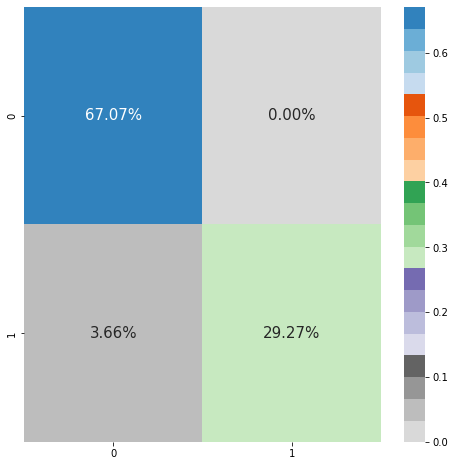

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%',  annot = True, annot_kws = {'size':15}, cmap = 'tab20c_r')

Best Threshold Catboost =0.508028, G-Means=0.943
Best threshold catboost from Youdens J Statistic =0.508028


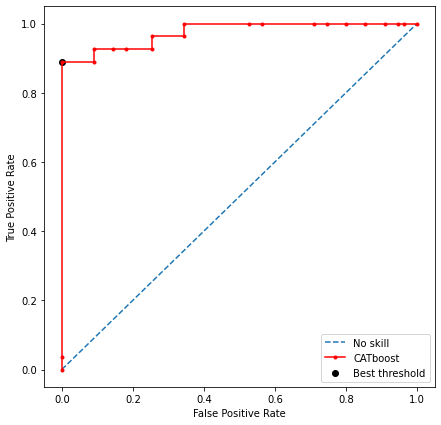

In [ ]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax


yhat1 = model.predict_proba(X_test)
yhat1 = yhat1[:,1]
fpr1, tpr1, threshold1 = roc_curve(Y_test,yhat1)
gmeans1 = sqrt(tpr1*(1-fpr1))
ix1 = argmax(gmeans1)
j1 = tpr1-fpr1
ixj1 = argmax(j1)
btj1 = threshold1[ixj1]
print('Best Threshold Catboost =%f, G-Means=%.3f'%(threshold1[ix1], gmeans1[ix1]))
print('Best threshold catboost from Youdens J Statistic =%f'%(btj1))



plt.figure(figsize=(7,7))
plt.plot([0,1], [0,1], linestyle='--',label='No skill')

plt.plot(fpr1, tpr1, marker='.',color='red',label='CATboost')
plt.scatter(fpr1[ix1], tpr1[ix1], marker= 'o',color = 'black', label='Best threshold' )


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Building Predictive System

In [ ]:
input_data=(494.08,494.08,5.54,0.88,6.295454545,6.63,49.7,0,0,13,15)

#change input to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('you do not have PCOS')
else:
    print('seek medical help, you have PCOS')


[1]
seek medical help, you have PCOS


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

loading the saved model

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data=(494.08,494.08,5.54,0.88,6.295454545,6.63,49.7,0,0,13,15)

#change input to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('you do not have PCOS')
else:
    print('seek medical help, you have PCOS')

[1]
seek medical help, you have PCOS
